## Code Anuj-Anupam

In [1]:
import json
import sys
import pathlib
import rasterio
from rasterio.mask import mask

In [2]:
tiffFileName=r"C:\Users\AJain7\Downloads\landsat7_india_500_2011-01-01_2011-04-17.tif"
jsonFileName=r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\District-Level Training\2011_Dist.geojson"
output_folder_path = '1'

In [3]:
countryData = json.loads(open(jsonFileName).read())

In [4]:
for currDistrictFeature in countryData["features"]:
	# currDistrictFeature=countryData["features"][0]
	distName=currDistrictFeature["properties"]['DISTRICT']
	st_cen_cd=currDistrictFeature["properties"]['ST_CEN_CD']
	st_name=currDistrictFeature["properties"]['ST_NM']
	censuscode=currDistrictFeature["properties"]['censuscode']
	geoms=currDistrictFeature["geometry"]
	listGeom=[]
	listGeom.append(geoms)
	geoms=listGeom
	with rasterio.open(tiffFileName) as src:
		out_image, out_transform = mask(src, geoms, crop=True)

	out_meta = src.meta.copy()

	# save the resulting raster  
	out_meta.update({"driver": "GTiff",
		"height": out_image.shape[1],
		"width": out_image.shape[2],
		"transform": out_transform})

	# path_to_district_tiffs=output_folder_path + '\\' + str(st_name)
	path_to_district_tiffs=output_folder_path
	pathlib.Path(path_to_district_tiffs).mkdir(parents=True, exist_ok=True)

	with rasterio.open(path_to_district_tiffs +'\\'+ distName + '@' + str(st_cen_cd) + '@' + str(censuscode) + ".tiff", "w", **out_meta) as dest:
		dest.write(out_image)

## Code Phaneesh

In [1]:
import json
import sys
import os
import pathlib
import rasterio
from rasterio.mask import mask

In [12]:
tiffFolderPath = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\5. District_level\Cross-Sectional\data\VIIRS_IndiaFiles"
jsonFileName='2011_Dist.geojson'
output_folder_path = '1'

In [13]:
countryData = json.loads(open(jsonFileName).read())

In [14]:
for currDistrictFeature in countryData["features"]:
	# currDistrictFeature=countryData["features"][0]
	distName=currDistrictFeature["properties"]['DISTRICT']
	st_cen_cd=currDistrictFeature["properties"]['ST_CEN_CD']
	st_name=currDistrictFeature["properties"]['ST_NM']
	censuscode=currDistrictFeature["properties"]['censuscode']
	geoms=currDistrictFeature["geometry"]
	listGeom=[]
	listGeom.append(geoms)
	geoms=listGeom
	
	flag_dist_found = False

	for satTiff in os.listdir(tiffFolderPath):
		tiffFile = tiffFolderPath + '\\' + satTiff
		try:
			with rasterio.open(tiffFile) as src:
				out_image, out_transform = mask(src, geoms, crop=True)
		except rasterio.errors.WindowError:
			print("!!! WINDOW ERROR !!!")
			continue
		except ValueError:
			print('!!!Value Error!!!')
			print('dist: ', distName ,'\tState:', st_name)
			continue
		flag_dist_found = True
	
	if flag_dist_found == False:
		print('dist Not found in any tiff file', distName, "  ", st_name)
		continue
	# try:
	# 	with rasterio.open(tiffFileName) as src:
	# 		out_image, out_transform = mask(src, geoms, crop=True)
	# except rasterio.errors.WindowError:
	# 	print("!!! WINDOW ERROR !!!")
	# 	continue
	# except ValueError:
	# 	print('!!!Value Error!!!')
	# 	print('dist: ', distName ,'\tState:', st_name)
	# 	continue

	out_meta = src.meta.copy()

	# save the resulting raster  
	out_meta.update({"driver": "GTiff",
		"height": out_image.shape[1],
		"width": out_image.shape[2],
		"transform": out_transform})

	# path_to_district_tiffs=output_folder_path + '\\' + str(st_name)
	path_to_district_tiffs=output_folder_path
	pathlib.Path(path_to_district_tiffs).mkdir(parents=True, exist_ok=True)

	with rasterio.open(path_to_district_tiffs +'\\'+ distName + '@' + str(st_cen_cd) + '@' + str(censuscode) + ".tiff", "w", **out_meta) as dest:
		dest.write(out_image)

!!!Value Error!!!
dist:  Adilabad 	State: Andhra Pradesh
dist Not found in any tiff file Adilabad    Andhra Pradesh
!!!Value Error!!!
dist:  Agra 	State: Uttar Pradesh
dist Not found in any tiff file Agra    Uttar Pradesh
!!!Value Error!!!
dist:  Ahmadabad 	State: Gujarat
dist Not found in any tiff file Ahmadabad    Gujarat
!!!Value Error!!!
dist:  Ahmadnagar 	State: Maharashtra
dist Not found in any tiff file Ahmadnagar    Maharashtra
!!!Value Error!!!
dist:  Aizawl 	State: Mizoram
dist Not found in any tiff file Aizawl    Mizoram
!!!Value Error!!!
dist:  Ajmer 	State: Rajasthan
dist Not found in any tiff file Ajmer    Rajasthan
!!!Value Error!!!
dist:  Akola 	State: Maharashtra
dist Not found in any tiff file Akola    Maharashtra
!!!Value Error!!!
dist:  Alappuzha 	State: Kerala
dist Not found in any tiff file Alappuzha    Kerala
!!!Value Error!!!
dist:  Aligarh 	State: Uttar Pradesh
dist Not found in any tiff file Aligarh    Uttar Pradesh
!!!Value Error!!!
dist:  Alirajpur 	State: M

!!!Value Error!!!
dist:  Bijnor 	State: Uttar Pradesh
dist Not found in any tiff file Bijnor    Uttar Pradesh
!!!Value Error!!!
dist:  Bikaner 	State: Rajasthan
dist Not found in any tiff file Bikaner    Rajasthan
!!!Value Error!!!
dist:  Bilaspur 	State: Chhattisgarh
dist Not found in any tiff file Bilaspur    Chhattisgarh
!!!Value Error!!!
dist:  Bilaspur 	State: Himachal Pradesh
dist Not found in any tiff file Bilaspur    Himachal Pradesh
!!!Value Error!!!
dist:  Birbhum 	State: West Bengal
dist Not found in any tiff file Birbhum    West Bengal
!!!Value Error!!!
dist:  Bishnupur 	State: Manipur
dist Not found in any tiff file Bishnupur    Manipur
!!!Value Error!!!
dist:  Bokaro 	State: Jharkhand
dist Not found in any tiff file Bokaro    Jharkhand
!!!Value Error!!!
dist:  Bongaigaon 	State: Assam
dist Not found in any tiff file Bongaigaon    Assam
!!!Value Error!!!
dist:  Budaun 	State: Uttar Pradesh
dist Not found in any tiff file Budaun    Uttar Pradesh
!!!Value Error!!!
dist:  Bul

!!!Value Error!!!
dist:  Dohad 	State: Gujarat
dist Not found in any tiff file Dohad    Gujarat
!!!Value Error!!!
dist:  Dumka 	State: Jharkhand
dist Not found in any tiff file Dumka    Jharkhand
!!!Value Error!!!
dist:  Dungarpur 	State: Rajasthan
dist Not found in any tiff file Dungarpur    Rajasthan
!!!Value Error!!!
dist:  Durg 	State: Chhattisgarh
dist Not found in any tiff file Durg    Chhattisgarh
!!!Value Error!!!
dist:  Dimapur 	State: Nagaland
dist Not found in any tiff file Dimapur    Nagaland
!!!Value Error!!!
dist:  East 	State: NCT of Delhi
dist Not found in any tiff file East    NCT of Delhi
!!!Value Error!!!
dist:  East 	State: Sikkim
dist Not found in any tiff file East    Sikkim
!!!Value Error!!!
dist:  East Garo Hills 	State: Meghalaya
dist Not found in any tiff file East Garo Hills    Meghalaya
!!!Value Error!!!
dist:  East Godavari 	State: Andhra Pradesh
dist Not found in any tiff file East Godavari    Andhra Pradesh
!!!Value Error!!!
dist:  East Kameng 	State: Aru

dist:  Jhansi 	State: Uttar Pradesh
dist Not found in any tiff file Jhansi    Uttar Pradesh
!!!Value Error!!!
dist:  Jharsuguda 	State: Odisha
dist Not found in any tiff file Jharsuguda    Odisha
!!!Value Error!!!
dist:  Jhunjhunun 	State: Rajasthan
dist Not found in any tiff file Jhunjhunun    Rajasthan
!!!Value Error!!!
dist:  Jodhpur 	State: Rajasthan
dist Not found in any tiff file Jodhpur    Rajasthan
!!!Value Error!!!
dist:  Jorhat 	State: Assam
dist Not found in any tiff file Jorhat    Assam
!!!Value Error!!!
dist:  Junagadh 	State: Gujarat
dist Not found in any tiff file Junagadh    Gujarat
!!!Value Error!!!
dist:  Jyotiba Phule Nagar 	State: Uttar Pradesh
dist Not found in any tiff file Jyotiba Phule Nagar    Uttar Pradesh
!!!Value Error!!!
dist:  Kachchh 	State: Gujarat
dist Not found in any tiff file Kachchh    Gujarat
!!!Value Error!!!
dist:  Kaimur (bhabua) 	State: Bihar
dist Not found in any tiff file Kaimur (bhabua)    Bihar
!!!Value Error!!!
dist:  Kaithal 	State: Harya

!!!Value Error!!!
dist:  Meerut 	State: Uttar Pradesh
dist Not found in any tiff file Meerut    Uttar Pradesh
!!!Value Error!!!
dist:  Mewat 	State: Haryana
dist Not found in any tiff file Mewat    Haryana
!!!Value Error!!!
dist:  Mirzapur 	State: Uttar Pradesh
dist Not found in any tiff file Mirzapur    Uttar Pradesh
!!!Value Error!!!
dist:  Moga 	State: Punjab
dist Not found in any tiff file Moga    Punjab
!!!Value Error!!!
dist:  Mokokchung 	State: Nagaland
dist Not found in any tiff file Mokokchung    Nagaland
!!!Value Error!!!
dist:  Mon 	State: Nagaland
dist Not found in any tiff file Mon    Nagaland
!!!Value Error!!!
dist:  Moradabad 	State: Uttar Pradesh
dist Not found in any tiff file Moradabad    Uttar Pradesh
!!!Value Error!!!
dist:  Morena 	State: Madhya Pradesh
dist Not found in any tiff file Morena    Madhya Pradesh
!!!Value Error!!!
dist:  Muktsar 	State: Punjab
dist Not found in any tiff file Muktsar    Punjab
!!!Value Error!!!
dist:  Mumbai 	State: Maharashtra
dist Not

!!!Value Error!!!
dist:  Rohtas 	State: Bihar
dist Not found in any tiff file Rohtas    Bihar
!!!Value Error!!!
dist:  Rudraprayag 	State: Uttarakhand
dist Not found in any tiff file Rudraprayag    Uttarakhand
!!!Value Error!!!
dist:  Rupnagar 	State: Punjab
dist Not found in any tiff file Rupnagar    Punjab
!!!Value Error!!!
dist:  Sabar Kantha 	State: Gujarat
dist Not found in any tiff file Sabar Kantha    Gujarat
!!!Value Error!!!
dist:  Sagar 	State: Madhya Pradesh
dist Not found in any tiff file Sagar    Madhya Pradesh
!!!Value Error!!!
dist:  Saharanpur 	State: Uttar Pradesh
dist Not found in any tiff file Saharanpur    Uttar Pradesh
!!!Value Error!!!
dist:  Saharsa 	State: Bihar
dist Not found in any tiff file Saharsa    Bihar
!!!Value Error!!!
dist:  Sahibganj 	State: Jharkhand
dist Not found in any tiff file Sahibganj    Jharkhand
!!!Value Error!!!
dist:  Sahibzada Ajit Singh Nagar 	State: Punjab
dist Not found in any tiff file Sahibzada Ajit Singh Nagar    Punjab
!!!Value Err

dist Not found in any tiff file Vaishali    Bihar
!!!Value Error!!!
dist:  Valsad 	State: Gujarat
dist Not found in any tiff file Valsad    Gujarat
!!!Value Error!!!
dist:  Varanasi 	State: Uttar Pradesh
dist Not found in any tiff file Varanasi    Uttar Pradesh
!!!Value Error!!!
dist:  Vellore 	State: Tamil Nadu
dist Not found in any tiff file Vellore    Tamil Nadu
!!!Value Error!!!
dist:  Vidisha 	State: Madhya Pradesh
dist Not found in any tiff file Vidisha    Madhya Pradesh
!!!Value Error!!!
dist:  Viluppuram 	State: Tamil Nadu
dist Not found in any tiff file Viluppuram    Tamil Nadu
!!!Value Error!!!
dist:  Virudunagar 	State: Tamil Nadu
dist Not found in any tiff file Virudunagar    Tamil Nadu
!!!Value Error!!!
dist:  Visakhapatnam 	State: Andhra Pradesh
dist Not found in any tiff file Visakhapatnam    Andhra Pradesh
!!!Value Error!!!
dist:  Vizianagaram 	State: Andhra Pradesh
dist Not found in any tiff file Vizianagaram    Andhra Pradesh
!!!Value Error!!!
dist:  Warangal 	State: 

## Merging duplicate files

In [1]:
import numpy as np
%matplotlib inline

In [17]:
folder = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\5. District_level\Cross-Sectional\data\districtVIIRSTiff100_2012"
for files in os.listdir(folder):
    if "(2)" in files:
        print(files)

Dibang Valley@12@257 (2).tiff
Lower Dibang Valley@12@258 (2).tiff
Nicobar@35@638 (2).tiff
Tinsukia@18@309 (2).tiff
Tirap@12@254 (2).tiff


In [69]:
file1 = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\5. District_level\Cross-Sectional\data\districtVIIRSTiff100_2012\Tirap@12@254 (2).tiff"
file2 = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\5. District_level\Cross-Sectional\data\districtVIIRSTiff100_2012\Tirap@12@254.tiff"

In [70]:
data1 = rasterio.open(file1).read(1)
data2 = rasterio.open(file2).read(1)

In [71]:
print(data1.shape)
print(data2.shape)

(685, 93)
(685, 479)


In [72]:
data_fin = np.hstack((data2, data1))
print(data_fin.shape)

(685, 572)


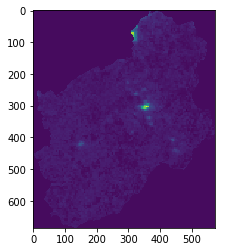

In [73]:
plt.imshow(data_fin)

In [74]:
pickle.dump(data_fin,open("Tirap@12@254.pkl","wb"))

## Processing files - creating feature vector for sum of night lights

In [26]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import rasterio

In [2]:
folder = r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\5. District_level\Cross-Sectional\data\districtVIIRSTiff100_2012"

In [3]:
df_list = []
counter = 0
for file in os.listdir(folder):
    
    district_code = file.split('@')[2].split('.')[0]
    
    if '.tiff' in file:
        print('#### Running for ', file, ' - ', counter)
        counter = counter+1
        data = rasterio.open(os.path.join(folder, file)).read(1)
    
    elif '.pkl' in file:
        print('#### Running for ', file, ' - ', counter)
        counter = counter+1
        data = pickle.load(open(os.path.join(folder, file),"rb"))    
    
    data = data[~np.isnan(data)]
    mean, std = data.mean(), data.std()
    upper_limit = min(mean + 3*std, data.max())
    lower_limit = max(mean - 3*std, data.min())
    data = data[data < upper_limit]
    data = data[data > lower_limit]
    sum_nl = data.sum()
    arr = np.array([district_code, sum_nl])
    df = pd.DataFrame(arr)
    df = df.transpose()
    df_list.append(df)
final_df = pd.concat(df_list)
final_df.columns = ['census_code', 'sum_nightlights']
final_df.reset_index(drop=True, inplace=True)

#### Running for  Adilabad@28@532.tiff  -  0
#### Running for  Agra@9@146.tiff  -  1
#### Running for  Ahmadabad@24@474.tiff  -  2
#### Running for  Ahmadnagar@27@522.tiff  -  3
#### Running for  Aizawl@15@283.tiff  -  4
#### Running for  Ajmer@8@119.tiff  -  5
#### Running for  Akola@27@501.tiff  -  6
#### Running for  Alappuzha@32@598.tiff  -  7
#### Running for  Aligarh@9@143.tiff  -  8
#### Running for  Alirajpur@23@465.tiff  -  9
#### Running for  Allahabad@9@175.tiff  -  10
#### Running for  Almora@5@64.tiff  -  11
#### Running for  Alwar@8@104.tiff  -  12
#### Running for  Ambala@6@70.tiff  -  13
#### Running for  Ambedkar Nagar@9@178.tiff  -  14
#### Running for  Amravati@27@503.tiff  -  15
#### Running for  Amreli@24@480.tiff  -  16
#### Running for  Amritsar@3@49.tiff  -  17
#### Running for  Anand@24@482.tiff  -  18
#### Running for  Anantapur@28@553.tiff  -  19
#### Running for  Anantnag@1@14.tiff  -  20
#### Running for  Anjaw@12@260.tiff  -  21
#### Running for  Anugul@21

#### Running for  Farrukhabad@9@159.tiff  -  182
#### Running for  Fatehabad@6@78.tiff  -  183
#### Running for  Fatehgarh Sahib@3@40.tiff  -  184
#### Running for  Fatehpur@9@172.tiff  -  185
#### Running for  Firozabad@9@147.tiff  -  186
#### Running for  Firozpur@3@43.tiff  -  187
#### Running for  Gadag@29@561.tiff  -  188
#### Running for  Gajapati@21@389.tiff  -  189
#### Running for  Ganderbal@1@11.tiff  -  190
#### Running for  Gandhinagar@24@473.tiff  -  191
#### Running for  Ganganagar@8@99.tiff  -  192
#### Running for  Ganjam@21@388.tiff  -  193
#### Running for  Garhchiroli@27@508.tiff  -  194
#### Running for  Garhwa@20@346.tiff  -  195
#### Running for  Garhwal@5@61.tiff  -  196
#### Running for  Gautam Buddha Nagar@9@141.tiff  -  197
#### Running for  Gaya@10@236.tiff  -  198
#### Running for  Ghaziabad@9@140.tiff  -  199
#### Running for  Ghazipur@9@195.tiff  -  200
#### Running for  Giridih@20@349.tiff  -  201
#### Running for  Goalpara@18@302.tiff  -  202
#### Runnin

#### Running for  Mahe@34@636.tiff  -  360
#### Running for  Mahendragarh@6@84.tiff  -  361
#### Running for  Mahesana@24@471.tiff  -  362
#### Running for  Mahoba@9@169.tiff  -  363
#### Running for  Mainpuri@9@148.tiff  -  364
#### Running for  Malappuram@32@592.tiff  -  365
#### Running for  Maldah@19@332.tiff  -  366
#### Running for  Malkangiri@21@399.tiff  -  367
#### Running for  Mamit@15@281.tiff  -  368
#### Running for  Mandi@2@27.tiff  -  369
#### Running for  Mandla@23@454.tiff  -  370
#### Running for  Mandsaur@23@433.tiff  -  371
#### Running for  Mandya@29@573.tiff  -  372
#### Running for  Mansa@3@47.tiff  -  373
#### Running for  Marigaon@18@304.tiff  -  374
#### Running for  Mathura@9@145.tiff  -  375
#### Running for  Mau@9@192.tiff  -  376
#### Running for  Mayurbhanj@21@376.tiff  -  377
#### Running for  Medak@28@535.tiff  -  378
#### Running for  Meerut@9@138.tiff  -  379
#### Running for  Mewat@6@87.tiff  -  380
#### Running for  Mirzapur@9@199.tiff  -  381
#### 

#### Running for  Sindhudurg@27@529.tiff  -  535
#### Running for  Singrauli@23@463.tiff  -  536
#### Running for  Sirmaur@2@32.tiff  -  537
#### Running for  Sirohi@8@117.tiff  -  538
#### Running for  Sirsa@6@79.tiff  -  539
#### Running for  Sitamarhi@10@206.tiff  -  540
#### Running for  Sitapur@9@154.tiff  -  541
#### Running for  Sivaganga@33@622.tiff  -  542
#### Running for  Sivasagar@18@311.tiff  -  543
#### Running for  Siwan@10@218.tiff  -  544
#### Running for  Solan@2@31.tiff  -  545
#### Running for  Solapur@27@526.tiff  -  546
#### Running for  Sonbhadra@9@200.tiff  -  547
#### Running for  Sonipat@6@76.tiff  -  548
#### Running for  Sonitpur@18@306.tiff  -  549
#### Running for  South 24 Parganas@19@343.tiff  -  550
#### Running for  South Andaman@35@640.tiff  -  551
#### Running for  South Garo Hills@17@295.tiff  -  552
#### Running for  South Goa@30@586.tiff  -  553
#### Running for  South Tripura@16@290.tiff  -  554
#### Running for  South West@7@97.tiff  -  555
####

In [15]:
final_df['sum_nightlights'] = final_df['sum_nightlights'].astype(float)
final_df = final_df[final_df['sum_nightlights'] > 0.0]

In [57]:
print('Minimum value',final_df['sum_nightlights'].min())
print('Maximum value',final_df['sum_nightlights'].max())

Minimum value 15.502992
Maximum value 2722110.8


In [50]:
snl_data = final_df['sum_nightlights'].values

mean, std = snl_data.mean(), snl_data.std()
upper_limit = min(mean + 3*std, snl_data.max())
lower_limit = max(mean - 3*std, snl_data.min())

print(lower_limit, '--',upper_limit)

In [64]:
final_df = final_df[final_df['sum_nightlights'] < upper_limit]
final_df = final_df[final_df['sum_nightlights'] > lower_limit]

In [66]:
print('Minimum value',final_df['sum_nightlights'].min())
print('Maximum value',final_df['sum_nightlights'].max())

Minimum value 824.5779
Maximum value 816681.0


In [67]:
final_df.to_csv('VIIRS_2012_SumNightLights_100m.csv',index=False)

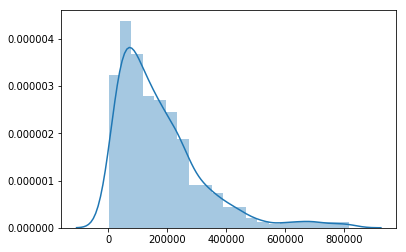

In [62]:
sns.distplot(snl_data)